In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [3]:
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),
             math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30))
            for x in range(1,n+1)]

In [4]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(100)])


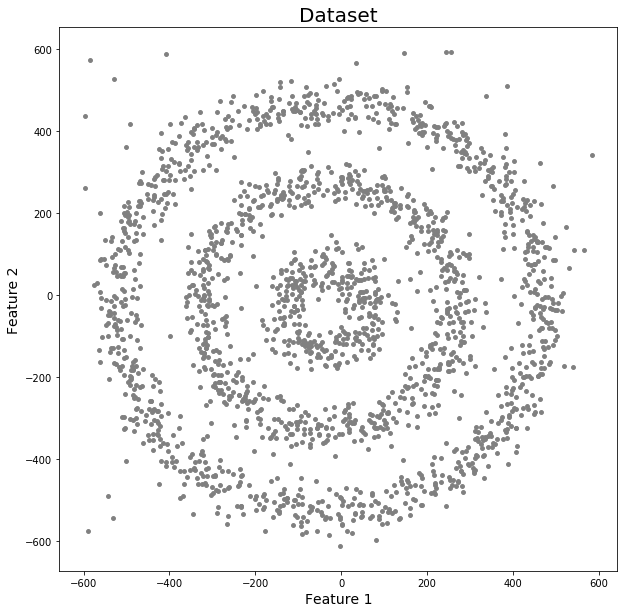

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

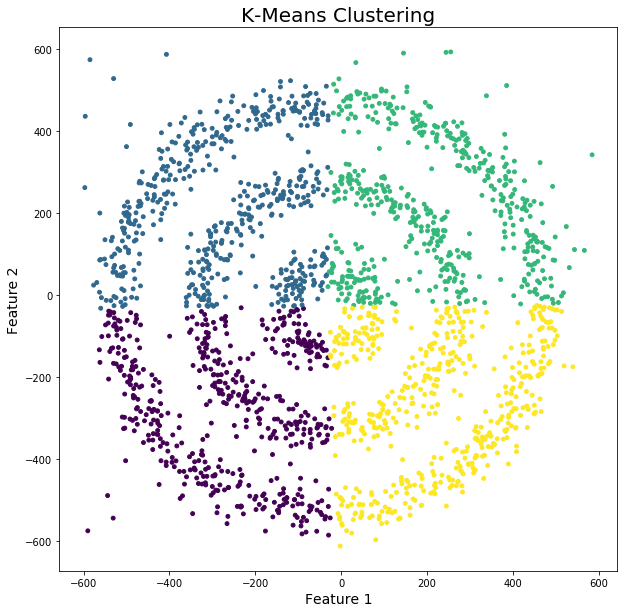

In [6]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4)
k_means.fit(df[[0,1]])

df['KMeans_labels']=k_means.labels_

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()



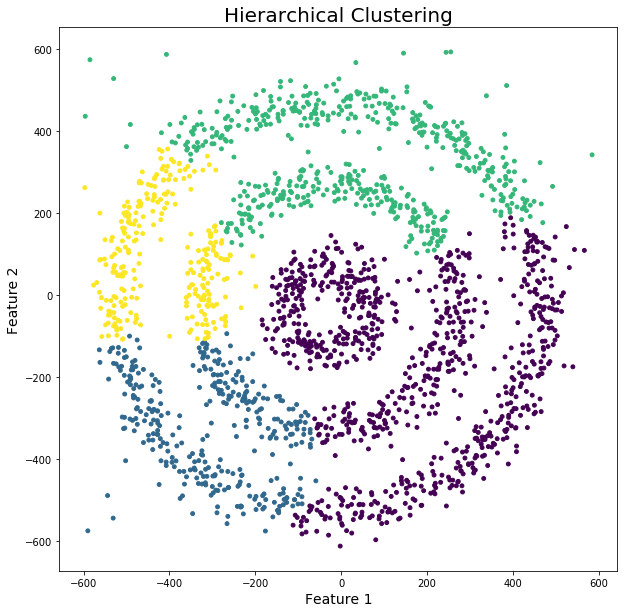

In [7]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
model.fit(df[[0,1]])

df['HR_labels']=model.labels_

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


In [8]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

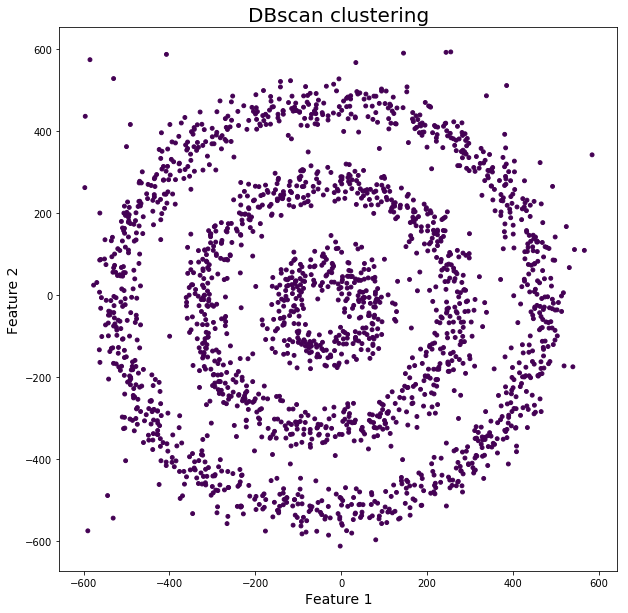

In [9]:
df['dbscan_labels']=dbscan.labels_
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],s=15)
plt.title('DBscan clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [13]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(df[[0,1]])
distances,indices=nbrs.kneighbors(df[[0,1]])



In [14]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
distances

array([  0.22379981,   0.22379981,   0.4722822 , ..., 106.88779163,
       119.97082979, 136.41847382])

Text(0, 0.5, 'epsilon')

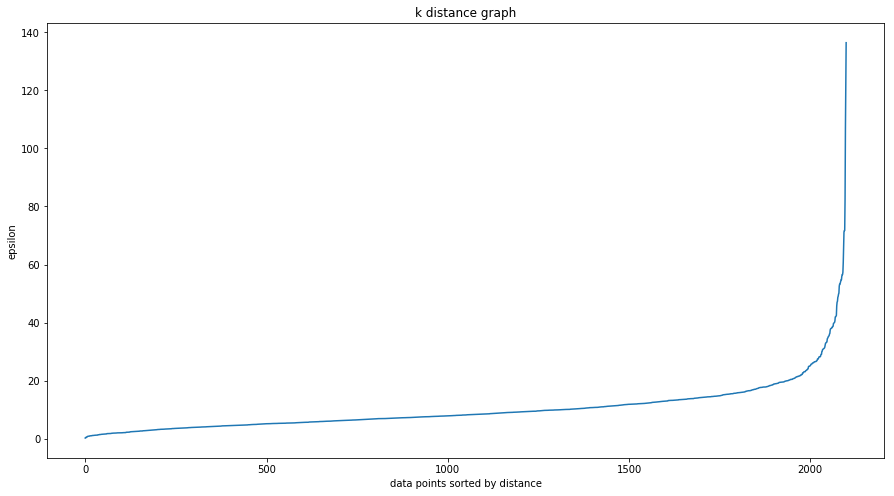

In [16]:
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.title("k distance graph")
plt.xlabel("data points sorted by distance")
plt.ylabel("epsilon")

In [22]:
dbscan=DBSCAN(eps=30,min_samples=4)
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=4, n_jobs=None, p=None)

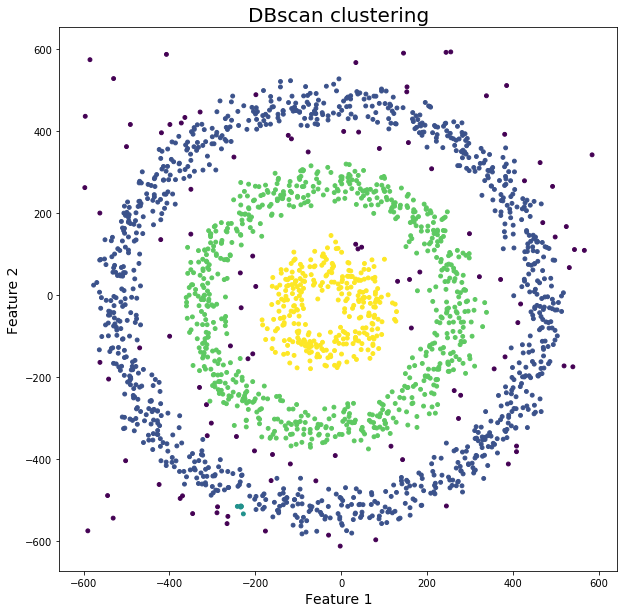

In [23]:
df['dbscan_labels']=dbscan.labels_
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['dbscan_labels'],s=15)
plt.title('DBscan clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()